In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Exploratory data analysis/razumjevanje podataka i statistička analiza:

Učitavanje dataseta

In [2]:

df = pd.read_csv('datasets/50_Startups.csv')

In [3]:

df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Osnovne informacije o datasetu

In [4]:

df.shape

(50, 5)

In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


Provjeravanje duplikata i NaN vrijednosti

In [6]:

df.duplicated().sum()

0

In [7]:

df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

Proračunati osnovne statističke karakteristike dataseta: min, max, std, median. \
Dati prigodan komentar.

In [8]:
df.describe().round(2)

,R&D Spend,Administration,Marketing Spend,Profit
count,50.00,50.00,50.00,50.00
mean,73721.62,121344.64,211025.10,112012.64
std,45902.26,28017.80,122290.31,40306.18
min,0.00,51283.14,0.00,14681.40
25%,39936.37,103730.88,129300.13,90138.90
50%,73051.08,122699.80,212716.24,107978.19
75%,101602.80,144842.18,299469.08,139765.98
max,165349.20,182645.56,471784.10,192261.83


Provjeravanje jedinstvenih vrijednosti za kolonu 'State'

In [9]:

df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

Izdvojiti DataFrame koji u koloni 'State' imaju vrijednost 'Florida'

In [10]:

df[df['State']=='Florida']

,R&D Spend,Administration,Marketing Spend,State,Profit
2,153441.51,101145.55,407934.54,Florida,191050.39
4,142107.34,91391.77,366168.42,Florida,166187.94
7,130298.13,145530.06,323876.68,Florida,155752.60
10,101913.08,110594.11,229160.95,Florida,146121.95
12,93863.75,127320.38,249839.44,Florida,141585.52
14,119943.24,156547.42,256512.92,Florida,132602.65
18,91749.16,114175.79,294919.57,Florida,124266.90
22,73994.56,122782.75,303319.26,Florida,110352.25
23,67532.53,105751.03,304768.73,Florida,108733.99
26,75328.87,144135.98,134050.07,Florida,105733.54


Izdvojiti startupe koji su za R&D potrošili preko 150_000 $

In [11]:

df[df['R&D Spend'] > 150_000]

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39


Izdvojiti startupe koji su za R&D potrošili preko 50_000 $ a na marketing preko 50_000

In [26]:

df[(df['R&D Spend'] > 50_000) & (df['Marketing Spend'] > 50_000)]

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


####  Exploratory data analysis/vizualizacija podataka:


Kreirati graf za broj jedinstvenih vrijednosti u koloni 'State'. X-osa kolona 'State', y-osa - broj jedinstvenih vrijednosti

<Axes: xlabel='State', ylabel='count'>

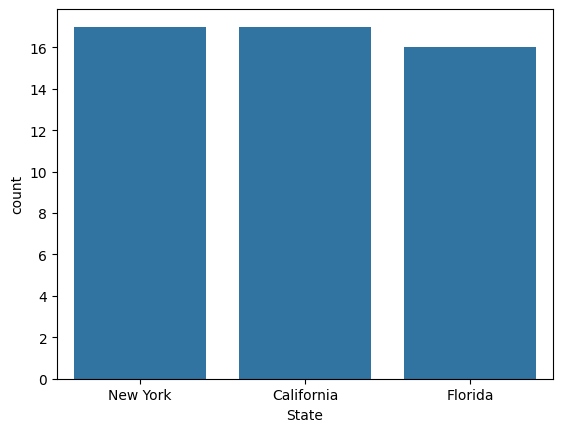

In [13]:

sns.countplot(x='State',data=df)

Kreirati boxplot dijagram za kolonu 'Profit'. Napisati prigodan komentar za dobijeni dijagram.

<Axes: ylabel='Profit'>

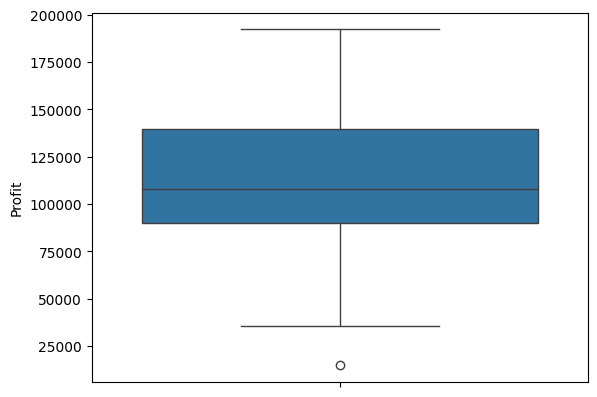

In [14]:

sns.boxplot(data=df, y='Profit')

Kreirati boxplot dijagram za odnos 'State' i 'Profit'. Komentarisati dobijeni dijagram

<Axes: xlabel='State', ylabel='Profit'>

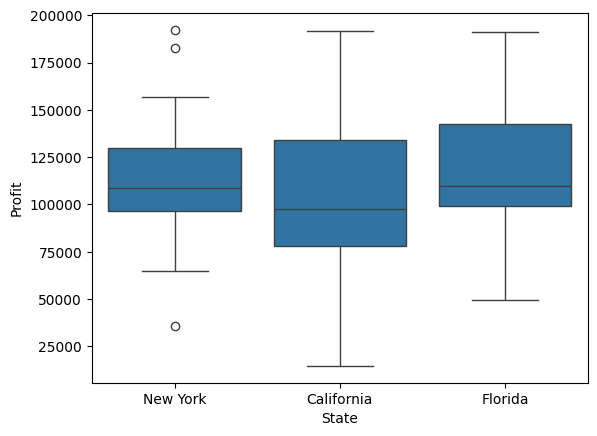

In [15]:

sns.boxplot(data=df, x='State', y='Profit')

Kreirati sccater plot za odnos 'R&D' i profita

<Axes: xlabel='R&D Spend', ylabel='Profit'>

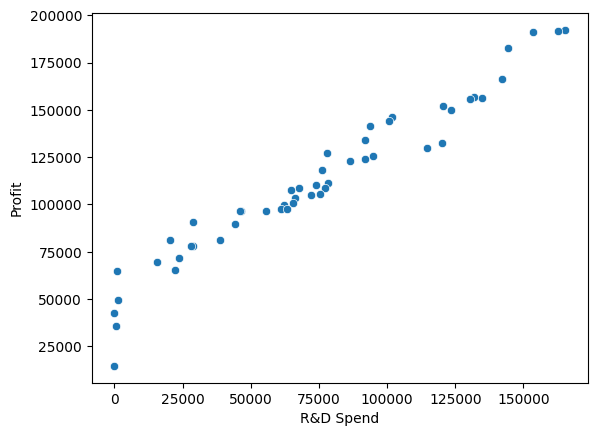

In [16]:

sns.scatterplot(data=df, x='R&D Spend', y='Profit')

Kreirati sccater plot za odnos 'Administration' i profita


<Axes: xlabel='Administration', ylabel='Profit'>

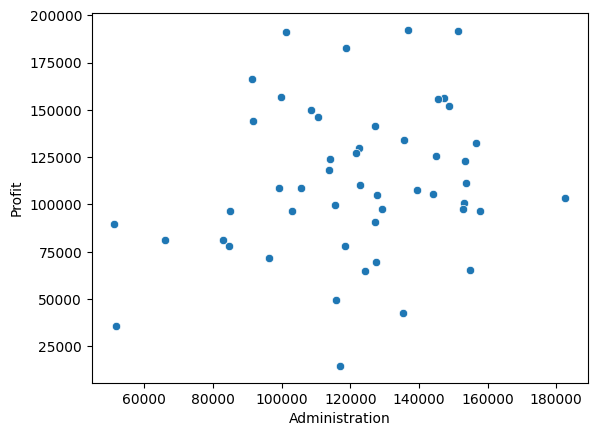

In [17]:

sns.scatterplot(data=df, x='Administration', y='Profit')

Kreirati sccater plot za odnos Marketing Spend i profita


<Axes: xlabel='Marketing Spend', ylabel='Profit'>

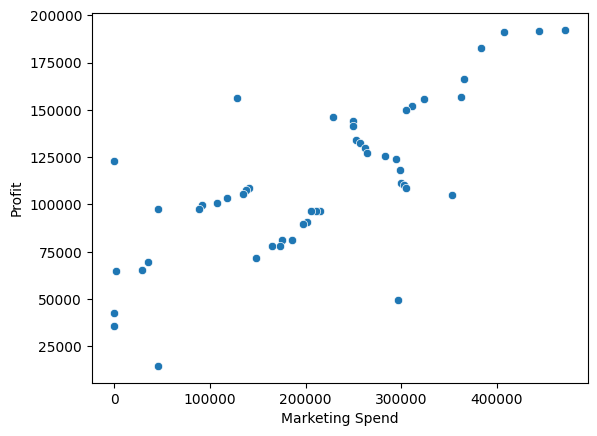

In [18]:

sns.scatterplot(data=df, x='Marketing Spend', y='Profit')

Izracunati korelacionu matricu za dataset, te prikazati dijagram za istu.

In [19]:

df.loc[:,df.columns!='State'].corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<Axes: >

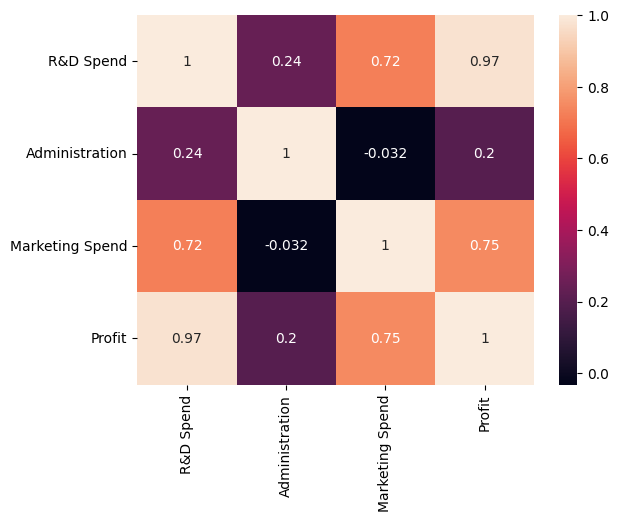

In [20]:
corr_mat = df.loc[:,df.columns!='State'].corr()
sns.heatmap(corr_mat, annot=True)

#### Kreiranje machine learning modela

Izvršiti predikciju profita za utrošak 100_000 na R&D, te naći MSE i R2

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [22]:
X = df['R&D Spend'].values.reshape(-1,1)
y = df['Profit'].values

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [27]:
lr.predict(np.array([100_000]).reshape(-1,1))[0].round(2)

133824.65

In [28]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [29]:
print('Mean sum of squares (MSE): %.2f ' % mean_squared_error(y_test, y_test_pred))
print('R2-score: %.2f' % r2_score(y_test, y_test_pred) )

Mean sum of squares (MSE): 54096271.53 
R2-score: 0.94
